In [3]:
import numpy as np
import pandas as pd
import ROOT as r
import uproot as ur
import pickle
from tqdm import tqdm_notebook as tqdm
%matplotlib inline 
import matplotlib.pyplot as plt
plt.rc('figure', facecolor='w', figsize=(8,6))
plt.rc('axes', labelsize=24)
plt.rc('axes', titlesize=24)

In [4]:
input_file = ur.open('../data/step3_vbf_bdt/output_combined.root')

## get background

In [5]:
df_zjets_16 = input_file['zjets_M50_2016'].pandas.df()
df_zjets_17 = input_file['zjets_M50_2017'].pandas.df()
df_zjets_18 = input_file['zjets_M50_2018'].pandas.df()
df_zjets = pd.concat([df_zjets_16, df_zjets_17, df_zjets_18], sort=False)

In [6]:
df_zg_16 = input_file['zg_llg_2016'].pandas.df()
df_zg_17 = input_file['zg_llg_2017'].pandas.df()
df_zg_18 = input_file['zg_llg_2018'].pandas.df()
df_zg = pd.concat([df_zg_16, df_zg_17, df_zg_18], sort=False)

In [7]:
df_zg_ewk_16 = input_file['zg_ewk_2016'].pandas.df()
df_zg_ewk_17 = input_file['zg_ewk_2017'].pandas.df()
df_zg_ewk_18 = input_file['zg_ewk_2018'].pandas.df()
df_zg_ewk = pd.concat([df_zg_ewk_16, df_zg_ewk_17, df_zg_ewk_18], sort=False)

In [8]:
df_ttjets_16 = input_file['ttjets_2016'].pandas.df()
df_ttjets_17 = input_file['ttjets_2017'].pandas.df()
df_ttjets_18 = input_file['ttjets_2018'].pandas.df()
df_ttjets = pd.concat([df_ttjets_16, df_ttjets_17, df_ttjets_18], sort=False)

In [9]:
df_background = pd.concat([df_zjets, df_zg, df_zg_ewk, df_ttjets], sort=False)
#df_background = pd.concat([df_zjets, df_zg], sort=False)

## get signal

In [10]:
df_ggh_16 = input_file['hzg_gluglu_M125_2016'].pandas.df()
df_ggh_17 = input_file['hzg_gluglu_M125_2017'].pandas.df()
df_ggh_18 = input_file['hzg_gluglu_M125_2018'].pandas.df()
df_ggh = pd.concat([df_ggh_16, df_ggh_17, df_ggh_18], sort=False)

In [11]:
df_vbf_16 = input_file['hzg_vbf_M125_2016'].pandas.df()
df_vbf_17 = input_file['hzg_vbf_M125_2017'].pandas.df()
df_vbf_18 = input_file['hzg_vbf_M125_2018'].pandas.df()
df_vbf = pd.concat([df_vbf_16, df_vbf_17, df_vbf_18], sort=False)

In [12]:
df_wplush_16 = input_file['hzg_wplush_M125_2016'].pandas.df()
df_wplush_17 = input_file['hzg_wplush_M125_2017'].pandas.df()
df_wplush_18 = input_file['hzg_wplush_M125_2018'].pandas.df()
df_wplush = pd.concat([df_wplush_16, df_wplush_17, df_wplush_18], sort=False)

In [13]:
df_wminush_16 = input_file['hzg_wminush_M125_2016'].pandas.df()
df_wminush_17 = input_file['hzg_wminush_M125_2017'].pandas.df()
df_wminush_18 = input_file['hzg_wminush_M125_2018'].pandas.df()
df_wminush = pd.concat([df_wminush_16, df_wminush_17, df_wminush_18], sort=False)

In [14]:
df_zh_16 = input_file['hzg_zh_M125_2016'].pandas.df()
df_zh_17 = input_file['hzg_zh_M125_2017'].pandas.df()
df_zh_18 = input_file['hzg_zh_M125_2018'].pandas.df()
df_zh = pd.concat([df_zh_16, df_zh_17, df_zh_18], sort=False)

In [15]:
df_tth_16 = input_file['hzg_tth_M125_2016'].pandas.df()
df_tth_17 = input_file['hzg_tth_M125_2017'].pandas.df()
df_tth_18 = input_file['hzg_tth_M125_2018'].pandas.df()
df_tth = pd.concat([df_tth_16, df_tth_17, df_tth_18], sort=False)

In [16]:
df_signal = pd.concat([df_ggh, df_vbf, df_wplush, df_wminush, df_zh, df_tth], sort=False)

## get data

In [17]:
muon_2016B = input_file['muon_2016B'].pandas.df()
muon_2016C = input_file['muon_2016C'].pandas.df()
muon_2016D = input_file['muon_2016D'].pandas.df()
muon_2016E = input_file['muon_2016E'].pandas.df()
muon_2016F = input_file['muon_2016F'].pandas.df()
muon_2016G = input_file['muon_2016G'].pandas.df()
muon_2016H = input_file['muon_2016H'].pandas.df()

muon_2016 = pd.concat([muon_2016B, muon_2016C, muon_2016D, muon_2016E, muon_2016F, muon_2016G, muon_2016H], sort=False)

In [18]:
electron_2016B = input_file['electron_2016B'].pandas.df()
electron_2016C = input_file['electron_2016C'].pandas.df()
electron_2016D = input_file['electron_2016D'].pandas.df()
electron_2016E = input_file['electron_2016E'].pandas.df()
electron_2016F = input_file['electron_2016F'].pandas.df()
electron_2016G = input_file['electron_2016G'].pandas.df()
electron_2016H = input_file['electron_2016H'].pandas.df()

electron_2016 = pd.concat([electron_2016B, electron_2016C, electron_2016D, electron_2016E, electron_2016F, electron_2016G, electron_2016H], sort=False)

In [19]:
muon_2017B = input_file['muon_2017B'].pandas.df()
muon_2017C = input_file['muon_2017C'].pandas.df()
muon_2017D = input_file['muon_2017D'].pandas.df()
muon_2017E = input_file['muon_2017E'].pandas.df()
muon_2017F = input_file['muon_2017F'].pandas.df()

muon_2017 = pd.concat([muon_2017B, muon_2017C, muon_2017D, muon_2017E, muon_2017F], sort=False)

In [20]:
electron_2017B = input_file['electron_2017B'].pandas.df()
electron_2017C = input_file['electron_2017C'].pandas.df()
electron_2017D = input_file['electron_2017D'].pandas.df()
electron_2017E = input_file['electron_2017E'].pandas.df()
electron_2017F = input_file['electron_2017F'].pandas.df()

electron_2017 = pd.concat([electron_2017B, electron_2017C, electron_2017D, electron_2017E, electron_2017F], sort=False)

In [21]:
muon_2018A = input_file['muon_2018A'].pandas.df()
muon_2018B = input_file['muon_2018B'].pandas.df()
muon_2018C = input_file['muon_2018C'].pandas.df()
muon_2018D = input_file['muon_2018D'].pandas.df()

muon_2018 = pd.concat([muon_2018A, muon_2018B, muon_2018C, muon_2018D], sort=False)

In [22]:
electron_2018A = input_file['electron_2018A'].pandas.df()
electron_2018B = input_file['electron_2018B'].pandas.df()
electron_2018C = input_file['electron_2018C'].pandas.df()
electron_2018D = input_file['electron_2018D'].pandas.df()

electron_2018 = pd.concat([electron_2018A, electron_2018B, electron_2018C, electron_2018D], sort=False)

In [23]:
df_data = pd.concat([muon_2016, muon_2017, muon_2018,
                     electron_2016, electron_2017, electron_2018], sort=False)

## use only non-TMVA training events for category optimization

In [24]:
df_signal.query('useTMVA == 0', inplace=True)
df_vbf.query('useTMVA == 0', inplace=True)
df_background.query('useTMVA == 0', inplace=True)

## get cuts for the dijet categories 

In [25]:
dijet_signal = df_vbf.query('isDijetTag == True')
dijet_background = df_background.query('isDijetTag == True')
dijet_data = df_data.query('isDijetTag == True')

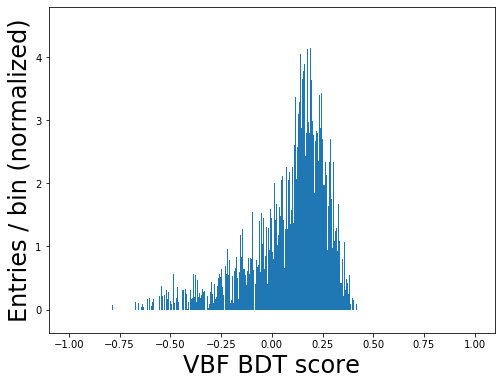

In [26]:
nbins = 10000
fig, ax = plt.subplots()
h = ax.hist(dijet_signal['vbf_bdt_james'], bins=np.linspace(-1., 1., num=nbins), density=True,
            weights=dijet_signal['eventWeight']*dijet_signal['genWeight']*dijet_signal['mc_sf']*dijet_signal['pt_weight'])
#h = ax.hist(dijet_signal['vbf_bdt'], bins=np.linspace(-1., 1., num=nbins), density=True,
#            weights=dijet_signal['eventWeight']*dijet_signal['genWeight']*dijet_signal['mc_sf']*dijet_signal['pt_weight'])
ax.set_xlabel('VBF BDT score');
ax.set_ylabel('Entries / bin (normalized)');

In [27]:
sig_cdf_dijet = np.cumsum(h[0])/np.sum(h[0])

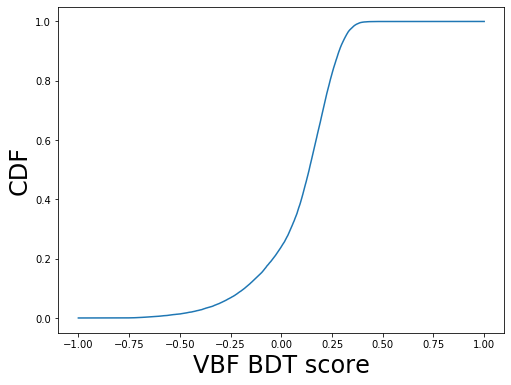

In [28]:
fig, ax = plt.subplots()
ax.plot((h[1][1:]+h[1][:-1])/2., sig_cdf_dijet);
ax.set_xlabel('VBF BDT score');
ax.set_ylabel('CDF');

In [29]:
dijet_signal.loc[:, 'vbf_bdt_james_bin'] = pd.cut(dijet_signal['vbf_bdt_james'], bins = np.linspace(-1.,1.,num=nbins), labels=False).astype('int')
dijet_background.loc[:, 'vbf_bdt_james_bin'] = pd.cut(dijet_background['vbf_bdt_james'], bins = np.linspace(-1.,1.,num=nbins), labels=False).astype('int')
dijet_data.loc[:, 'vbf_bdt_james_bin'] = pd.cut(dijet_data['vbf_bdt_james'], bins = np.linspace(-1.,1.,num=nbins), labels=False).astype('int')
#dijet_signal.loc[:, 'vbf_bdt_bin'] = pd.cut(dijet_signal['vbf_bdt'], bins = np.linspace(-1.,1.,num=nbins), labels=False).astype('int')
#dijet_background.loc[:, 'vbf_bdt_bin'] = pd.cut(dijet_background['vbf_bdt'], bins = np.linspace(-1.,1.,num=nbins), labels=False).astype('int')
#dijet_data.loc[:, 'vbf_bdt_bin'] = pd.cut(dijet_data['vbf_bdt'], bins = np.linspace(-1.,1.,num=nbins), labels=False).astype('int')

/home/jamesbueghly/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/jamesbueghly/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [30]:
def get_cdf(b, cdf):
    return cdf[b]

In [31]:
dijet_signal.loc[:, 'transformed_vbf_bdt_james'] = dijet_signal['vbf_bdt_james_bin'].apply(get_cdf, cdf=sig_cdf_dijet)
dijet_background.loc[:, 'transformed_vbf_bdt_james'] = dijet_background['vbf_bdt_james_bin'].apply(get_cdf, cdf=sig_cdf_dijet)
dijet_data.loc[:, 'transformed_vbf_bdt_james'] = dijet_data['vbf_bdt_james_bin'].apply(get_cdf, cdf=sig_cdf_dijet)
#dijet_signal.loc[:, 'transformed_vbf_bdt'] = dijet_signal['vbf_bdt_bin'].apply(get_cdf, cdf=sig_cdf_dijet)
#dijet_background.loc[:, 'transformed_vbf_bdt'] = dijet_background['vbf_bdt_bin'].apply(get_cdf, cdf=sig_cdf_dijet)
#dijet_data.loc[:, 'transformed_vbf_bdt'] = dijet_data['vbf_bdt_bin'].apply(get_cdf, cdf=sig_cdf_dijet)

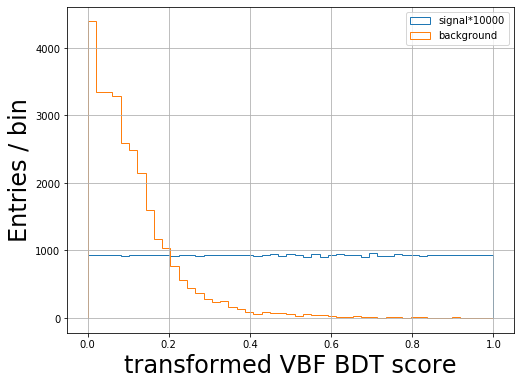

In [32]:
fig, ax = plt.subplots()
ax.hist(dijet_signal['transformed_vbf_bdt_james'], bins=np.linspace(0, 1, num=50), histtype='step',
        weights=10000*dijet_signal['eventWeight']*dijet_signal['genWeight']*dijet_signal['mc_sf']*dijet_signal['pt_weight']);
ax.hist(dijet_background['transformed_vbf_bdt_james'], bins=np.linspace(0, 1, num=50), histtype='step',
        weights=dijet_background['eventWeight']*dijet_background['genWeight']*dijet_background['mc_sf']*dijet_background['pt_weight']);
#ax.hist(dijet_signal['transformed_vbf_bdt'], bins=np.linspace(0, 1, num=50), histtype='step',
#        weights=10000*dijet_signal['eventWeight']*dijet_signal['genWeight']*dijet_signal['mc_sf']*dijet_signal['pt_weight']);
#ax.hist(dijet_background['transformed_vbf_bdt'], bins=np.linspace(0, 1, num=50), histtype='step',
#        weights=dijet_background['eventWeight']*dijet_background['genWeight']*dijet_background['mc_sf']*dijet_background['pt_weight']);
ax.set_xlabel('transformed VBF BDT score');
ax.set_ylabel('Entries / bin');
ax.legend(['signal*10000', 'background']);
ax.grid();

In [33]:
dijet_signal.query('transformed_vbf_bdt_james > 0.5')['vbf_bdt_james'].min()
#dijet_signal.query('transformed_vbf_bdt > 0.5')['vbf_bdt'].min()

0.13751788

In [34]:
dijet_signal.query('transformed_vbf_bdt_james > 0.3')['vbf_bdt_james'].min()
#dijet_signal.query('transformed_vbf_bdt > 0.3')['vbf_bdt'].min()

0.046505842

In [35]:
vbf_cut_dict = {}
#vbf_cut_dict['James'] = {'dijet_3': -1., 
#                         'dijet_2': -0.026900219, 
#                         'dijet_1': 0.14272581
#                        }
#vbf_cut_dict['James'] = {'dijet_3': -1., 
#                         'dijet_2': 0.047309462, 
#                         'dijet_1': 0.13832036
#                        }
#vbf_cut_dict['James'] = {'dijet_3': -1., 
#                         'dijet_2': 0.047309462, 
#                         'dijet_1': 0.13832036
#                        }
#vbf_cut_dict['James'] = {'dijet_3': -1., 
#                         'dijet_2': 0.046511907, 
#                         'dijet_1': 0.13773496
#                        }
#vbf_cut_dict['James'] = {'dijet_3': -1., 
#                         'dijet_2': 0.046511907, 
#                         'dijet_1': 0.13773496
#                        }
vbf_cut_dict['James'] = {'dijet_3': -1., 
                         'dijet_2': 0.046505842, 
                         'dijet_1': 0.13751788
                        }
vbf_cut_dict['Ming-Yan'] = {'dijet_3': -1., 
                         'dijet_2': 0.0425, 
                         'dijet_1': 0.137
                        }
#vbf_cut_dict['Ming-Yan'] = {'dijet_3': -1, 
#                            'dijet_2': 0.0425, 
#                            'dijet_1': 0.137
#                           }
pickle.dump(vbf_cut_dict, open('../data/mva_cuts/vbf_cuts.pkl', 'wb'))

## same thing for untagged

In [36]:
untagged_signal = df_signal.query('isLeptonTag == False and isDijetTag == False')
untagged_background = df_background.query('isLeptonTag == False and isDijetTag == False')
untagged_data = df_data.query('isLeptonTag == False and isDijetTag == False')

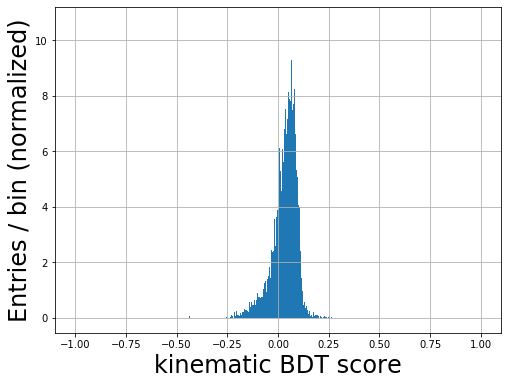

In [37]:
nbins = 10000
fig, ax = plt.subplots()
h = ax.hist(untagged_signal['kin_bdt_james'], bins=np.linspace(-1., 1., num=nbins), density=True, 
             weights=untagged_signal['eventWeight']*untagged_signal['genWeight']*untagged_signal['mc_sf']*untagged_signal['pt_weight'])
#h = ax.hist(untagged_signal['kin_bdt'], bins=np.linspace(-1., 1., num=nbins), density=True, 
#             weights=untagged_signal['eventWeight']*untagged_signal['genWeight']*untagged_signal['mc_sf']*untagged_signal['pt_weight'])
ax.set_xlabel('kinematic BDT score');
ax.set_ylabel('Entries / bin (normalized)');
ax.grid();

In [ ]:
sig_cdf_kin = np.cumsum(h[0])/np.sum(h[0])

fig, ax = plt.subplots()
ax.plot((h[1][1:]+h[1][:-1])/2., sig_cdf_kin);
ax.set_xlabel('kinematic BDT score');
ax.set_ylabel('CDF');
ax.grid();

In [ ]:
untagged_signal.loc[:, 'kin_bdt_james_bin'] = pd.cut(untagged_signal['kin_bdt_james'], bins = np.linspace(-1.,1.,num=nbins), labels=False).astype('int')
untagged_background.loc[:, 'kin_bdt_james_bin'] = pd.cut(untagged_background['kin_bdt_james'], bins = np.linspace(-1.,1.,num=nbins), labels=False).astype('int')
untagged_data.loc[:, 'kin_bdt_james_bin'] = pd.cut(untagged_data['kin_bdt_james'], bins = np.linspace(-1.,1.,num=nbins), labels=False).astype('int')
#untagged_signal.loc[:, 'kin_bdt_bin'] = pd.cut(untagged_signal['kin_bdt'], bins = np.linspace(-1.,1.,num=nbins), labels=False).astype('int')
#untagged_background.loc[:, 'kin_bdt_bin'] = pd.cut(untagged_background['kin_bdt'], bins = np.linspace(-1.,1.,num=nbins), labels=False).astype('int')
#untagged_data.loc[:, 'kin_bdt_bin'] = pd.cut(untagged_data['kin_bdt'], bins = np.linspace(-1.,1.,num=nbins), labels=False).astype('int')

In [ ]:
untagged_signal.loc[:, 'transformed_kin_bdt_james'] = untagged_signal['kin_bdt_james_bin'].apply(get_cdf, cdf=sig_cdf_kin)
untagged_background.loc[:, 'transformed_kin_bdt_james'] = untagged_background['kin_bdt_james_bin'].apply(get_cdf, cdf=sig_cdf_kin)
untagged_data.loc[:, 'transformed_kin_bdt_james'] = untagged_data['kin_bdt_james_bin'].apply(get_cdf, cdf=sig_cdf_kin)
#untagged_signal.loc[:, 'transformed_kin_bdt'] = untagged_signal['kin_bdt_bin'].apply(get_cdf, cdf=sig_cdf_kin)
#untagged_background.loc[:, 'transformed_kin_bdt'] = untagged_background['kin_bdt_bin'].apply(get_cdf, cdf=sig_cdf_kin)
#untagged_data.loc[:, 'transformed_kin_bdt'] = untagged_data['kin_bdt_bin'].apply(get_cdf, cdf=sig_cdf_kin)

In [ ]:
fig, ax = plt.subplots()
ax.hist(untagged_signal['transformed_kin_bdt_james'], bins=np.linspace(0, 1, num=50), histtype='step',
        weights=10000.*untagged_signal['eventWeight']*untagged_signal['genWeight']*untagged_signal['mc_sf']*untagged_signal['pt_weight']);
ax.hist(untagged_background['transformed_kin_bdt_james'], bins=np.linspace(0, 1, num=50), histtype='step',
        weights=untagged_background['eventWeight']*untagged_background['genWeight']*untagged_background['mc_sf']*untagged_background['pt_weight']);
#ax.hist(untagged_signal['transformed_kin_bdt'], bins=np.linspace(0, 1, num=50), histtype='step',
#        weights=10000.*untagged_signal['eventWeight']*untagged_signal['genWeight']*untagged_signal['mc_sf']*untagged_signal['pt_weight']);
#ax.hist(untagged_background['transformed_kin_bdt'], bins=np.linspace(0, 1, num=50), histtype='step',
#        weights=untagged_background['eventWeight']*untagged_background['genWeight']*untagged_background['mc_sf']*untagged_background['pt_weight']);
ax.set_xlabel('transformed kinematic BDT score');
ax.set_ylabel('Entries / bin');
ax.legend(['signal*10000', 'background']);
ax.grid();

In [ ]:
#print(untagged_signal.query('transformed_kin_bdt_james > 0.9')['kin_bdt_james'].min())
#print(untagged_signal.query('transformed_kin_bdt_james > 0.8')['kin_bdt_james'].min())
#print(untagged_signal.query('transformed_kin_bdt_james > 0.4')['kin_bdt_james'].min())
#print(untagged_signal.query('transformed_kin_bdt_james > 0.1')['kin_bdt_james'].min())
print(untagged_signal.query('transformed_kin_bdt > 0.9')['kin_bdt'].min())
print(untagged_signal.query('transformed_kin_bdt > 0.8')['kin_bdt'].min())
print(untagged_signal.query('transformed_kin_bdt > 0.4')['kin_bdt'].min())
print(untagged_signal.query('transformed_kin_bdt > 0.1')['kin_bdt'].min())

In [ ]:
kin_cut_dict = {}
#kin_cut_dict['James'] = {'untagged_4': -0.037494726, 
#                         'untagged_3': 0.025902633, 
#                         'untagged_2': 0.06730781, 
#                         'untagged_1': 0.082311645
#                        }
#kin_cut_dict['James'] = {'untagged_4': -0.039502952, 
#                         'untagged_3': 0.02810369, 
#                         'untagged_2': 0.070707306, 
#                         'untagged_1': 0.08530881
#                        }
#kin_cut_dict['James'] = {'untagged_4': -0.03729846, 
#                         'untagged_3': 0.027702842, 
#                         'untagged_2': 0.06790736, 
#                         'untagged_1': 0.081114806
#                        }
kin_cut_dict['James'] = {'untagged_4': -0.03570018,
                         'untagged_3': 0.02370287, 
                         'untagged_2': 0.06270681, 
                         'untagged_1': 0.0763077
                        }
kin_cut_dict['Ming-Yan'] = {'untagged_4': -0.038,
                            'untagged_3': 0.0233, 
                            'untagged_2': 0.0628, 
                            'untagged_1': 0.0766
                           }
pickle.dump(kin_cut_dict, open('../data/mva_cuts/kin_cuts.pkl', 'wb'))

## attempt at code for category optimization; need to think about this more

In [ ]:
from itertools import combinations

def calc_significance(signal, background, data, n_cats, bdt_variable='transformed_kin_bdt_james', drop_lowest=True):
    if drop_lowest:
        WPs = np.linspace(0.2, 0.9, num=8)
        signal.query(f'{bdt_variable} > 0.1', inplace=True)
        background.query(f'{bdt_variable} > 0.1', inplace=True)
        n_bounds = n_cats
    else:
        WPs = np.linspace(0.1, 0.9, num=9)
        n_bounds = n_cats - 1
        
    schemes = np.array(list(combinations(WPs, n_bounds)))
    
    significance = np.array([])
    for scheme in tqdm(schemes):
        lower_bound = 0.
        tmp_significance = 0.
        for WP in scheme:
            if WP == np.max(scheme):
                upper_bound = 1.
            else:
                upper_bound = WP
            tmp_signal = signal.query(f'{lower_bound} < {bdt_variable} < {upper_bound}')
            tmp_background = background.query(f'{lower_bound} < {bdt_variable} < {upper_bound}')
            tmp_data = data.query(f'{lower_bound} < {bdt_variable} < {upper_bound}')                          

            n_signal = np.sum(tmp_signal.eventWeight*tmp_signal.genWeight*tmp_signal.mc_sf*tmp_signal.pt_weight)
            n_background = np.sum(tmp_background.eventWeight*tmp_background.genWeight*tmp_background.mc_sf*tmp_background.pt_weight)
            tmp_significance += (n_signal**2)/n_background
            lower_bound = WP
                                  
            # check if enough data stats for background modeling
            fig, ax = plt.subplots()
            h_test = ax.hist(tmp_data.llgMKin, bins=np.arange(115., 170., 1))
            plt.close()
            # print(h_test[0])
            if 0 in h_test[0]:
                print(f'THERE ARE NOT ENOUGH STATS! Throwing out scheme {scheme}')
                tmp_significance = 0.
                break
                                  
        significance = np.append(significance, tmp_significance)
    max_significance = np.max(significance)
    max_significance_ix = np.argmax(significance)
    optimal_scheme = schemes[max_significance_ix]
    
    return max_significance, optimal_scheme

In [ ]:
n_cat_options = np.linspace(1, 8, num=8, dtype='int')
max_sig_list = np.array([])
scheme_list = []
for nc in tqdm(n_cat_options):
    [max_sig, opt_scheme] = calc_significance(untagged_signal.copy(), untagged_background.copy(), 
                                              untagged_data.copy(), nc)
    max_sig_list = np.append(max_sig_list, max_sig)
    scheme_list.append(opt_scheme)
scheme_list = np.array(scheme_list)

In [ ]:
fig, ax = plt.subplots()
ax.plot(n_cat_options, max_sig_list);
ax.set_xlabel('number of categories');
ax.set_ylabel('combined significance');
ax.grid()

In [ ]:
pct_diffs = 100*(max_sig_list[1:] - max_sig_list[:-1])/max_sig_list[:-1]

fig, ax = plt.subplots()
ax.plot(n_cat_options[1:], pct_diffs);
ax.axhline(1, color='r');
ax.grid();
ax.set_xlabel('number of categories');
ax.set_ylabel('percent improvement');

In [ ]:
n_cats_chosen = 3
scheme_list[n_cats_chosen-1]

## same thing for dijet

In [ ]:
n_cat_options = np.linspace(1, 9, num=9, dtype='int')
max_sig_list = np.array([])
scheme_list = []
for nc in tqdm(n_cat_options):
    [max_sig, opt_scheme] = calc_significance(dijet_signal.copy(), dijet_background.copy(), 
                                              dijet_data.copy(), nc, 
                                              bdt_variable='transformed_vbf_bdt_james', 
                                              drop_lowest=False)
    max_sig_list = np.append(max_sig_list, max_sig)
    scheme_list.append(opt_scheme)
scheme_list = np.array(scheme_list)

In [ ]:
fig, ax = plt.subplots()
ax.plot(n_cat_options, max_sig_list);
ax.set_xlabel('number of categories');
ax.set_ylabel('combined significance');
ax.grid()

In [ ]:
pct_diffs = 100*(max_sig_list[1:] - max_sig_list[:-1])/max_sig_list[:-1]

fig, ax = plt.subplots()
ax.plot(n_cat_options[1:], pct_diffs);
ax.axhline(1, color='r');
ax.grid();
ax.set_xlabel('number of categories');
ax.set_ylabel('percent improvement');

In [ ]:
pct_diffs

In [ ]:
n_cats_chosen = 4
scheme_list[n_cats_chosen-1]